In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs

ds = xr.open_dataset('slp.mon.mean.nc')

# 1. Slice the data
ds_nh = ds.sel(lat=slice(90, 20))
slp = ds_nh['slp']

# 2. Anomalies
climatology = slp.groupby('time.month').mean('time')
anomalies = slp.groupby('time.month') - climatology

# 3. Latitude weighting
weights = np.sqrt(np.cos(np.deg2rad(anomalies.lat)))
weighted_anoms = anomalies * weights

d:\Conda\conda_base\envs\meteorology\lib\site-packages\xarray\computation\apply_ufunc.py:818: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


In [4]:
data_2d = weighted_anoms.stack(site=('lat', 'lon')).values
data_2d = np.nan_to_num(data_2d)
A = data_2d.T
C = A @ A.T

evals, evecs = np.linalg.eigh(C)
idx = np.argsort(evals)[::-1]
evals = evals[idx]
evecs = evecs[:, idx]

eof1 = evecs[:, 0].reshape(len(ds_nh.lat), len(ds_nh.lon))

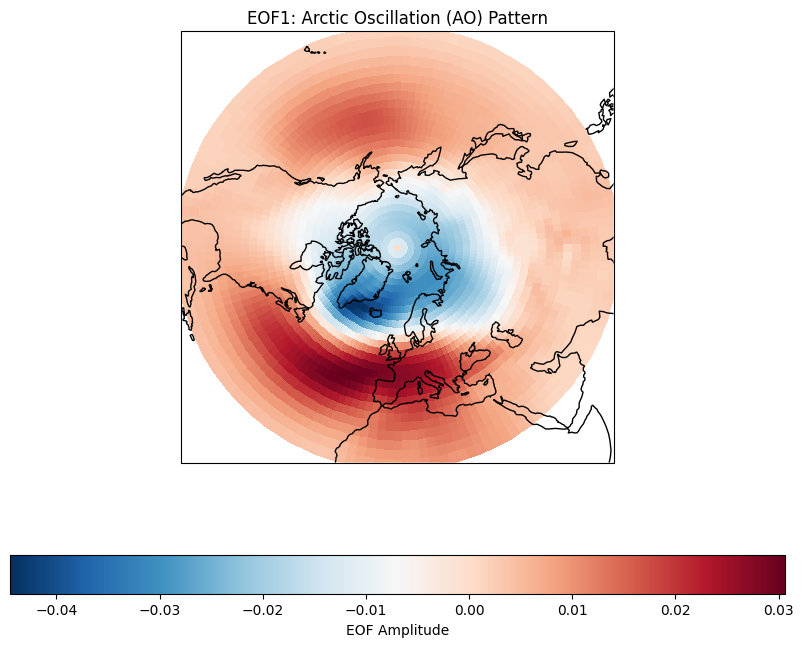

In [ ]:
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax.coastlines()

mesh = ax.pcolormesh(ds_nh.lon, ds_nh.lat, eof1, transform=ccrs.PlateCarree(), cmap='RdBu_r')
plt.colorbar(mesh, orientation='horizontal', label='EOF Amplitude')
plt.title('EOF1: Arctic Oscillation (AO) Pattern')
plt.show()

In [12]:
pc1 = data_2d @ evecs[:, 0]
if eof1[0, 0] > 0:
    eof1 *= -1
    pc1 *= -1
ao_index = (pc1 - np.mean(pc1)) / np.std(pc1)

var_exp = (evals / np.sum(evals)) * 100
print(f"Primary Pattern (AO) Variance: {var_exp[0]:.2f}%")
print(f"Secondary Pattern Variance: {var_exp[1]:.2f}%")

Primary Pattern (AO) Variance: 18.46%
Secondary Pattern Variance: 10.13%


Text(0, 0.5, 'Standardized Index')

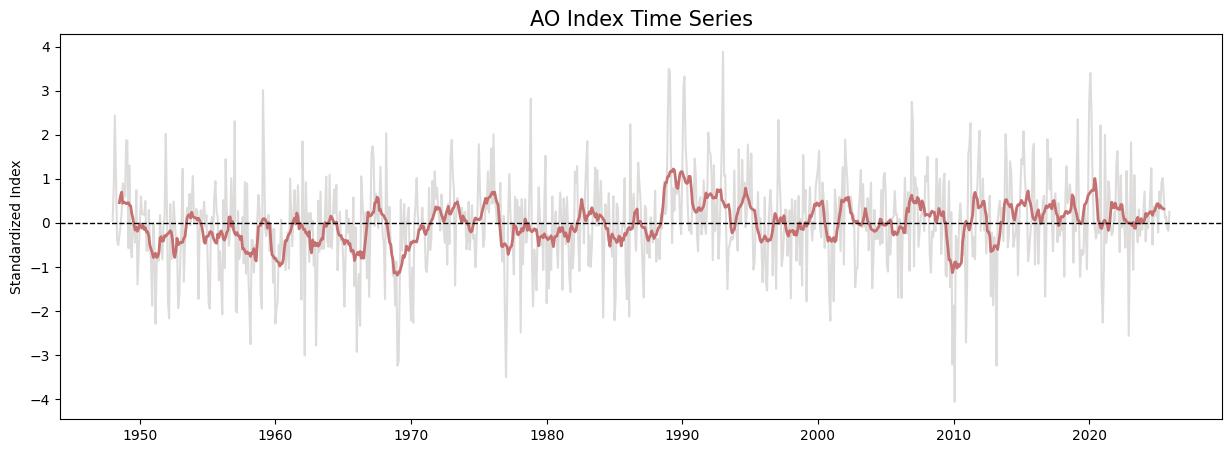

In [14]:
plt.figure(figsize=(15, 5))
ao_series = pd.Series(ao_index, index=ds_nh.time)
ao_smoothed = ao_series.rolling(window=12, center=True).mean()

plt.plot(ao_series.index, ao_series, color='#BEBAB9', alpha=0.5, label='Monthly AO Index')
plt.plot(ao_smoothed.index, ao_smoothed, color='#C47070', linewidth=2, label='12-month Moving Average')

plt.axhline(0, color='black', lw=1, linestyle='--')

plt.title('AO Index Time Series', fontsize=15)
plt.ylabel('Standardized Index')

d:\Conda\conda_base\envs\meteorology\lib\site-packages\xarray\computation\apply_ufunc.py:818: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


Primary Pattern (AO) Variance: 22.15%
Secondary Pattern Variance: 12.98%


Text(0, 0.5, 'Standardized Index')

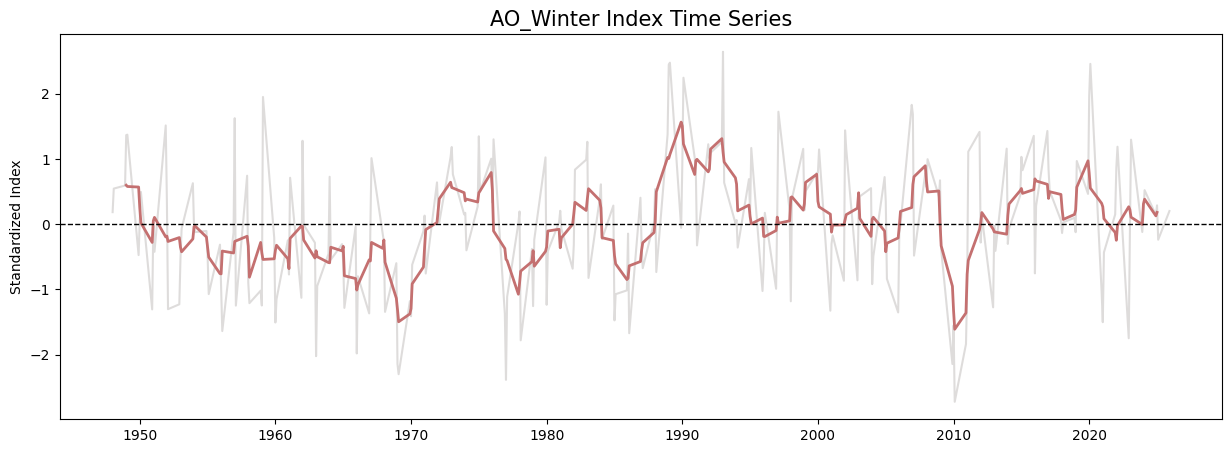

In [15]:
ds_winter = ds_nh.sel(time=ds_nh.time.dt.season=='DJF')
slp_winter = ds_winter['slp']

climatology_winter = slp_winter.groupby('time.month').mean('time')
anomalies_winter = slp_winter.groupby('time.month') - climatology_winter

weights_winter = np.sqrt(np.cos(np.deg2rad(anomalies_winter.lat)))
weighted_anoms_winter = anomalies_winter * weights_winter

data_2d_winter = weighted_anoms_winter.stack(site=('lat', 'lon')).values
data_2d_winter = np.nan_to_num(data_2d_winter)
A_w = data_2d_winter.T
C_w = A_w @ A_w.T

evals_w, evecs_w = np.linalg.eigh(C_w)
idx_w = np.argsort(evals_w)[::-1]
evals_w = evals_w[idx_w]
evecs_w = evecs_w[:, idx_w]

eof1_w = evecs_w[:, 0].reshape(len(ds_winter.lat), len(ds_winter.lon))
pc1_w = data_2d_winter @ evecs_w[:, 0]
if eof1_w[0, 0] > 0:
    eof1_w *= -1
    pc1_w *= -1
ao_idx_w = (pc1_w - np.mean(pc1_w)) / np.std(pc1_w)
var_exp_w = (evals_w / np.sum(evals_w)) * 100
print(f"Primary Pattern (AO) Variance: {var_exp_w[0]:.2f}%")
print(f"Secondary Pattern Variance: {var_exp_w[1]:.2f}%")

plt.figure(figsize=(15, 5))
ao_series_w = pd.Series(ao_idx_w, index=ds_winter.time)
ao_smoothed_w = ao_series_w.rolling(window=6, center=True).mean()

plt.plot(ao_series_w.index, ao_series_w, color='#BEBAB9', alpha=0.5, label='Monthly AO Index in Winter')
plt.plot(ao_smoothed_w.index, ao_smoothed_w, color='#C47070', linewidth=2, label='6-month Moving Average')

plt.axhline(0, color='black', lw=1, linestyle='--')

plt.title('AO_Winter Index Time Series', fontsize=15)
plt.ylabel('Standardized Index')

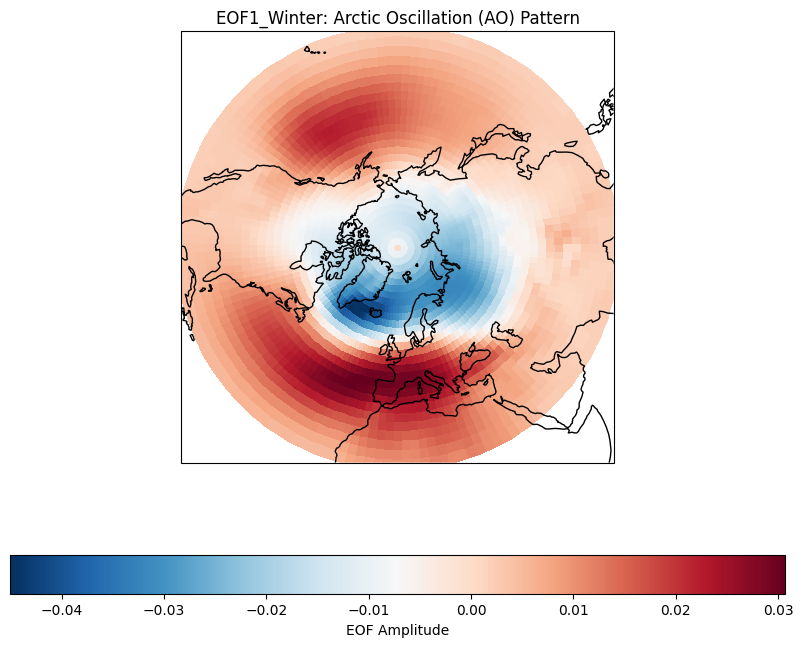

In [16]:
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax.coastlines()

mesh = ax.pcolormesh(ds_winter.lon, ds_winter.lat, eof1_w, transform=ccrs.PlateCarree(), cmap='RdBu_r')
plt.colorbar(mesh, orientation='horizontal', label='EOF Amplitude')
plt.title('EOF1_Winter: Arctic Oscillation (AO) Pattern')
plt.show()

C:\Users\32007\AppData\Local\Temp\ipykernel_17920\2055335232.py:17: UserWarning: Adding colorbar to a different Figure <Figure size 1000x800 with 2 Axes> than <Figure size 1200x600 with 2 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', shrink=0.8, pad=0.05)


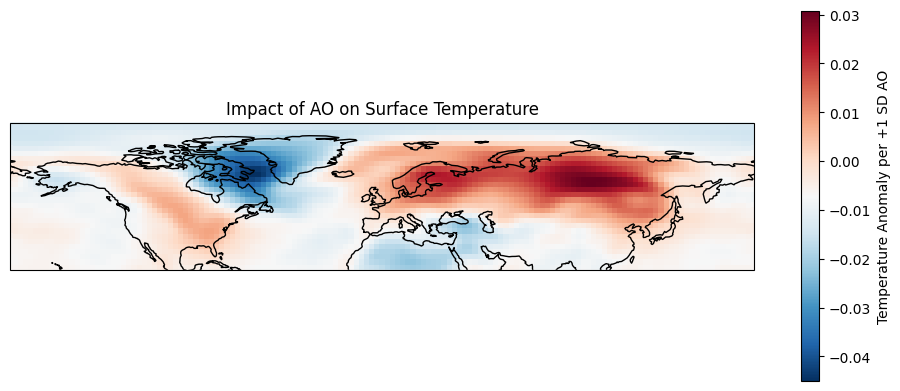

In [27]:
t_ds = xr.open_dataset('air.mon.mean.nc')
t_ds_nh = t_ds.sel(lat = slice(90, 20), level=1000)
t = t_ds_nh['air']

t_climatology = t.groupby('time.month').mean('time')
t_anoms = t.groupby('time.month') - t_climatology

pc1_da = xr.DataArray(pc1, coords=[ds_nh.time], dims='time', name='AO_Index')

reg_map = (t_anoms * pc1_da).mean(dim='time')

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
mesh_t = ax.pcolormesh(reg_map.lon, reg_map.lat, reg_map, transform=ccrs.PlateCarree(),
                       cmap='RdBu_r')
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', shrink=0.8, pad=0.05)
cbar.set_label('Temperature Anomaly per +1 SD AO')
plt.title("Impact of AO on Surface Temperature")
plt.show()